<center><h1>QBUS6850 - Machine Learning for Business</h1></center>

# Tutorial 2 - Linear Algebra, Data Handling and Plotting

## Libraries

For this tutorial you will need to use external libraries. Libraries are groups of useful functions for a particular domain.

The import statement is used to import code libraries.

In [64]:
import numpy as np

Numpy contains useful linear algebra functions. Numpy borrows many function names and concepts from MATLAB.

## Vectors

Creating a vector is straight forward with numpy. To create a vector you can either use either

In [65]:
a = np.array([1, 2, 3])

A = np.matrix([1, 2, 3])

where the contents of the [ ] (square brackets) are the contents of the vector.

You can check the shape of a vector by

In [66]:
print(a.shape)
print(A.shape)

(3,)
(1, 3)


**Note that the shape of vector a is different from vector A. This is because numpy array dimensions are ambiguous. It can be interpreted as a row or column vector. If you want to exactly specify the shape then use the matrix function instead to create your vector.**

Be careful with arrays! Products of arrays are elementwise, not vector multipliciation!

In [67]:
print(a * a)

[1 4 9]


Instead you should use

In [68]:
print(np.dot(a,a))

14


or

In [69]:
print(A * A.transpose())

[[14]]


The type of data that a vector (and matrix) can store is fixed to a single type. You cannot mix integers, floats etc in the same vector. Numpy infers the data type from the data used to create the vector. 

In [70]:
print(a.dtype)

c = np.array([1.0, 2.0, 3.0])

print(c.dtype)

int64
float64


Here are some useful shortcuts for creating common special vectors

In [71]:
# Length 10 zero vector
zeros = np.zeros((10,1))

# Length 5 ones vector
ones = np.ones((5,1))

# You can create a single valued vector as the product
# of a vector of ones and your desired value
twos = ones * 2

# 11 numbers from 0 to 100, evenly spaced
lin_spaced = np.linspace(0, 100, 11)

# All numbers from 0 up to (not including) 100 with gaps of 2
aranged = np.arange(0, 100, 2)

Vector transposition is straight forward

In [72]:
A_transposed = A.transpose()

Checking for vector/array equality is a little trickier than checking for equality of other types. Here is how I suggest you check if two vectors are equal

In [73]:
print(np.array_equal(A, A))
print(np.array_equal(A, A_transposed))

# You may wish to check equality up to a tolerance
# This is useful since floating points aren't perfect
print(np.allclose(A, A, rtol=1e-05))

True
False
True


Vectors can be summed together as expected, or linear combinations can be formed

In [74]:
c = a + a

d = 3*a * 1.5*c

Taking the norm of the vector is taken care of by numpy

In [75]:
norm2 = np.linalg.norm(a, ord=2)
print(norm2)

3.74165738677


We can test if two vectors are orthogonal by the dot product. If vectors are orthog then their inner product (dot product) is 0.

In [76]:
# Generate an orthogonal vector
x = [1, 2, 3]
y = [4, 5, 6]
orthog = np.cross(x, y)

print("Orthogonal") if np.dot(x, orthog) == 0 else print ("Not Orthogonal")

Orthogonal


## Matrices

Numpy Matrices behave in the same way as vectors

In [77]:
b = np.array([[1, 4, 7],
              [2, 5, 8],
              [3, 6, 9]])

B = np.matrix([[1, 4, 7],
              [2, 5, 8],
              [3, 6, 9]])

print(B)

[[1 4 7]
 [2 5 8]
 [3 6 9]]


In [78]:
# Multiplication of matrices is as normal
print(B * B)

[[ 30  66 102]
 [ 36  81 126]
 [ 42  96 150]]


In [79]:
# Scalar Product
print(5 * B)

[[ 5 20 35]
 [10 25 40]
 [15 30 45]]


In [80]:
# Summing
print(B + B)

[[ 2  8 14]
 [ 4 10 16]
 [ 6 12 18]]


In [81]:
# Transpose
print(B.transpose())

[[1 2 3]
 [4 5 6]
 [7 8 9]]


#### Some useful shortcuts for special matrices

In [82]:
# 10 x 10 zero matrix
m_zeros = np.zeros((10,10))
print(m_zeros)

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [83]:
# 5 x 5 ones matrix
m_ones = np.ones((5,5))
print(m_ones)

[[ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]]


In [84]:
# Matrix of all twos
m_twos = m_ones * 2
print(m_twos)

[[ 2.  2.  2.  2.  2.]
 [ 2.  2.  2.  2.  2.]
 [ 2.  2.  2.  2.  2.]
 [ 2.  2.  2.  2.  2.]
 [ 2.  2.  2.  2.  2.]]


Often we are interested in the diagonal entries of a matrix (e.g. covariance matrices) or creating a diagonal matrix (e.g. identity matrix)

In [85]:
# Identity matrix
eye = np.identity(3)
print(eye)

[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]


In [86]:
# Get the diagonal entries
diag_elements = np.diag(B)
print(diag_elements)

[1 5 9]


In [87]:
# Create a matrix with values along the diagonal
m_diag = np.diag([1,2,3])
print(m_diag)

[[1 0 0]
 [0 2 0]
 [0 0 3]]


Other useful functions of matrices include the rank, trace and determinant. The rank tells us how many linearly independent cols or rows there are, the trace is used in calculating norms and the determinant tells us if the matrix is invertible.

In [88]:
# Matrix Rank i.e. n linearly independent cols or rows
print(np.linalg.matrix_rank(B))

2


In [89]:
# Sum of diagonal entries
print(np.trace(B))

15


In [90]:
# Determinant
e = np.array([[1, 2], [3, 4]])
print(np.linalg.det(e))

-2.0


In [91]:
print("Matrix is invertible") if np.linalg.det(e) != 0 else print ("Matrix not invertible")

Matrix is invertible


## Pandas

Pandas is a library for data manipulation. The key feature of Pandas is that the data structures it uses can hold multiple different data types. For example it can create an array with integers, strings and floating point numbers all at once. You could consider this capability as similar to an excel spreadsheet. Whereas you cannot mix and match data types in Python Lists or Numpy Arrays.

Pandas is already installed and available in Anaconda/Spyder. To begin using it we first import it as follows

In [92]:
import pandas as pd

Download the **drinks.csv** file from Blackboard and place it in the same folder as your Python file.

Then load the CSV by using

In [93]:
drinks = pd.read_csv('drinks.csv') 

Check that the DataFrame was loaded correctly by viewing some basic information by using

In [94]:
drinks.dtypes


country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [95]:
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
country                         193 non-null object
beer_servings                   193 non-null int64
spirit_servings                 193 non-null int64
wine_servings                   193 non-null int64
total_litres_of_pure_alcohol    193 non-null float64
continent                       170 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 9.1+ KB


View summary statistics of the DataFrame drinks by using the describe function

In [96]:
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


Now you can begin to manipulate the data. Lets begin by extracting the beer_servings column. Extracting a column will return a variable with the Series type, not DataFrame. Series is for 1D data and DataFrame is for 2D data.

Here I have used the head function to show the first 5 rows.

In [97]:
drinks['beer_servings'].head()

0      0
1     89
2     25
3    245
4    217
Name: beer_servings, dtype: int64

Just like a DataFrame you can get statistics on a Series. Try it

In [98]:
drinks['beer_servings'].describe()

count    193.000000
mean     106.160622
std      101.143103
min        0.000000
25%       20.000000
50%       76.000000
75%      188.000000
max      376.000000
Name: beer_servings, dtype: float64

You can get single statistics from a series

In [99]:
drinks['beer_servings'].mean()

106.16062176165804

You can search or query the DataFrame. For example you can get the rows where the continent is Europe. Try the following

In [100]:
euro_frame = drinks[drinks['continent'] == 'EU']

Again you can query this Series for it’s own statistics.

In [101]:
euro_frame['beer_servings'].mean()

193.77777777777777

Queries can be compounded. In the following example you will get the countries in Europe where the number of wine servings is greater than 300. Try it.

In [102]:
euro_heavywine = drinks[(drinks['continent'] == 'EU') & (drinks['wine_servings'] > 300)]
euro_heavywine

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
3,Andorra,245,138,312,12.4,EU
61,France,127,151,370,11.8,EU
136,Portugal,194,67,339,11.0,EU


DataFrames can be sorted. Try the following code to sort by litres of alcohol and return the last 10 entries using the tail function

In [103]:
top_drinkers = drinks.sort_values(by='total_litres_of_pure_alcohol').tail(10)
top_drinkers

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
99,Luxembourg,236,133,271,11.4,EU
155,Slovakia,196,293,116,11.4,EU
81,Ireland,313,118,165,11.4,EU
141,Russian Federation,247,326,73,11.5,AS
61,France,127,151,370,11.8,EU
45,Czech Republic,361,170,134,11.8,EU
68,Grenada,199,438,28,11.9,NaN
3,Andorra,245,138,312,12.4,EU
98,Lithuania,343,244,56,12.9,EU
15,Belarus,142,373,42,14.4,EU


### Handling Missing Data

The drinks_corrupt.csv actually contains lots of missing entries. Pandas filters out any rows with missing data automatically for you. However sometimes you may want to filter them out manually or specify special codes to ignore etc.

In this case we want to do two things:
- Keep contintent code "NA" since this is valid and means "North America"
- Remove all other rows containing legitimate missing values

By default Pandas will convert "NA" to NaN data type. We should prevent this.

In [104]:
default_na_values = ['', '#N/A', '#N/A N/A', '#NA', '-1.#IND', '-1.#QNAN', '-NaN', '-nan', '1.#IND', '1.#QNAN', 'N/A', 'NA', 'NULL', 'NaN', 'nan']

our_na_values = default_na_values
our_na_values.remove('NA')

drinks_dirty = pd.read_csv('drinks_corrupt.csv', keep_default_na = False, na_values = our_na_values)

Check the number of NaN values per column

In [105]:
drinks_dirty.isnull().sum()

country                         0
beer_servings                   4
spirit_servings                 5
wine_servings                   1
total_litres_of_pure_alcohol    0
continent                       3
dtype: int64

To remove rows that contain any missing entries try the dropna function

In [106]:
drinks_clean = drinks_dirty.dropna()

If you want to remove rows where every column has a missing entry use the how parameter

In [107]:
drinks_clean_byrows = drinks_dirty.dropna(how='all')

You can avoid the creation of a new variable by doing an in place replacement. Try the following

In [108]:
drinks_dirty.dropna(inplace = True)

**Alternative**

Instead of deleting corrupt or missing entries you can replace them with a useful value. If we use the drinks.csv file we know there are no corrupt or missing entries. In this case we can simply use **replacement** to fix the "NA" (North America) issue.

In [109]:
drinks = pd.read_csv('drinks.csv')

To replace the data in place use the fillna function. Try the following to replace missing continent values with the string ‘NA’

In [110]:
drinks['continent'].fillna(value='NA', inplace=True)

### Creating Columns

You can create new columns as a function of (i.e. based on) the existing columns. For example try creating a total_servings column

In [111]:
drinks['total_servings'] = drinks.beer_servings + drinks.spirit_servings + drinks.wine_servings 

and create the total litres column

In [112]:
drinks['alcohol_mL'] = drinks.total_litres_of_pure_alcohol * 1000

Then check your changes using the head function

In [113]:
# Check changes
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings,alcohol_mL
0,Afghanistan,0,0,0,0.0,AS,0,0.0
1,Albania,89,132,54,4.9,EU,275,4900.0
2,Algeria,25,0,14,0.7,AF,39,700.0
3,Andorra,245,138,312,12.4,EU,695,12400.0
4,Angola,217,57,45,5.9,AF,319,5900.0


### Renaming Data

Renaming columns is straightforward

In [114]:
drinks.rename(columns={'total_litres_of_pure_alcohol':'alcohol_litres'}, inplace=True)

### Deleting Data

Deleting data is easy. Pandas provides two options. The first is with the drop function. Axis 1 refers to columns and axis 0 refers to rows.

In [115]:
drinks_wout_ml = drinks.drop(['alcohol_litres'], axis=1)

## Pyplot

Pyplot is a library for data plotting. Pyplot follows many of the conventions of MATLAB's plotting functions. It provides a very simple interface to plotting for common tasks.

Pyplot is already installed and available in Anaconda/Spyder. To begin using it we first import it as follows

In [116]:
import matplotlib.pyplot as plt

Pyplot requires a figure to draw each plot upon. A Figure can contain a single plot or you can subdivide it into many plots. You can think of a figure as a "blank canvas" to draw on.

By default Pyplot will draw on the las figure you created.

Creating a new figure is simple

In [117]:
my_figure = plt.figure()

### Bar Chart

Lets create a simple bar chart comparing the number of beer servings among EU countries that drink lots of wine.

The first parameter of the bar(x, y) function is the x position to draw at and the second is the vertical heights of each bar. Here we use x = ind and y = euro_heavywine['beer_servings']

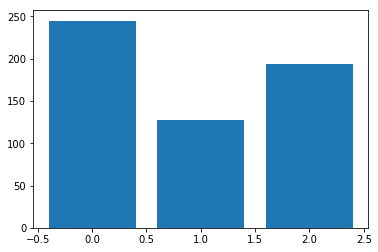

In [118]:
ind = np.arange(len(euro_heavywine))

plt.bar(ind, euro_heavywine['beer_servings'])

# This shows the figure
my_figure

We need to label the individual bars. We can use the xticks function to do this

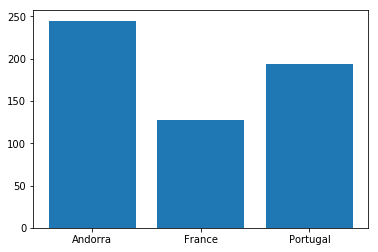

In [119]:
plt.xticks(ind, euro_heavywine['country'])

my_figure

Next label each of the axis

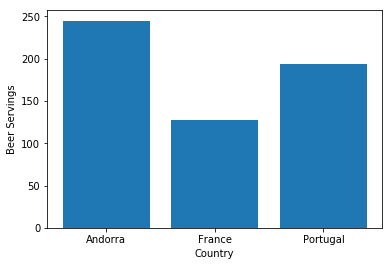

In [120]:
plt.xlabel("Country")
plt.ylabel("Beer Servings")

my_figure

Finally give your plot a title

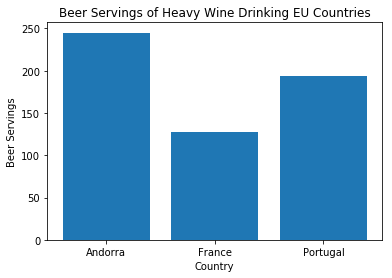

In [121]:
plt.title("Beer Servings of Heavy Wine Drinking EU Countries")

my_figure

### Line Plot

Lets create a line plot showing the total servings of top drinking countries in descending order.

Create a new figure to draw on

In [122]:
# Line Plot
my_figure2 = plt.figure()

Then sort the dataframe by total servings and pick the top 10 using the head function.

In [123]:
# Get the 10 countries with highest total servings
top_drinkers = drinks.sort_values(by='total_servings', ascending=False).head(10)

Then plot the total servings column of top_drinkers. You should also label your line plots so that you can show a legend later. Pyplot will automatically assign a colour to each of your lines. You can choose a specific colour like so

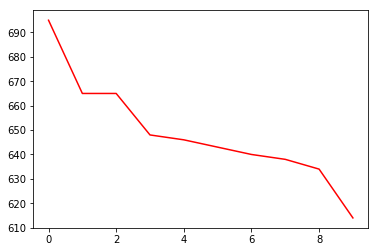

In [124]:
# Line plot with a label and custom colour
# Other optional parameters include linestyle and markerstyle
plt.plot(np.arange(0,10,1), top_drinkers['total_servings'], label="Total Servings", color="red")

my_figure2

Label each of the axis and title

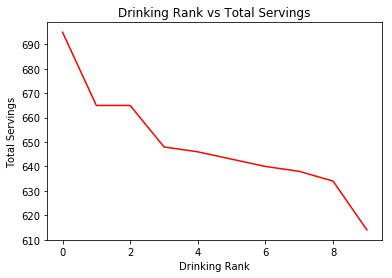

In [125]:
plt.xlabel("Drinking Rank")

plt.ylabel("Total Servings")

plt.title("Drinking Rank vs Total Servings")

my_figure2

Show the legend on your Figure

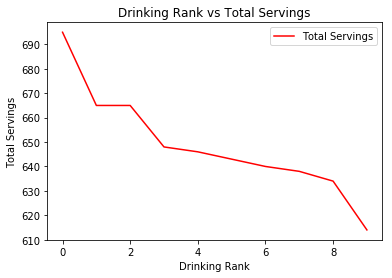

In [126]:
# Activate the legend using label information
plt.legend()

my_figure2